#Part-I Task-3

**Task-3** Anomaly Detection on Network Traffic Data (6 marks):

This is the data set used for a competition. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between "bad" connections, called intrusions or attacks, and "good" normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

Notes:

- To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as "Feature #", and the last attribute is the label. The label just has two values (1 for normal data and -1 for anomalies).

- You are required to perform anomaly detection on the two data sets with multiple methods. One-class SVM is optional while we encourage you to complete it by learning it from the sklearn online documentation.  


In [3]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from sklearn import preprocessing # import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor #import LOF
from sklearn.ensemble import IsolationForest #import iForest
from sklearn.metrics import roc_auc_score # import for AUC

data_path="drive/My Drive/Colab Notebooks"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv(f"{data_path}/MQClass/Assign-1/data/network-traffic-analysis/kddcup99.csv")
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Label
0,0.000000,3.370000e-07,0.000049,0,0.0,0,0.0,0.0,1,0.0,...,0.858824,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,1
1,0.000000,3.480000e-07,0.000050,0,0.0,0,0.0,0.0,1,0.0,...,0.898039,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,1
2,0.000000,3.420000e-07,0.000328,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.10,0.05,0.0,0.00,0.0,0.0,1
3,0.000000,4.280000e-07,0.000388,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,1
4,0.000000,2.900000e-07,0.000664,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,0.002057,4.020000e-07,0.000033,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.03,0.07,0.0,0.00,0.0,0.0,1
6961,0.000000,3.970000e-07,0.000048,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.50,0.08,0.0,0.00,0.0,0.0,1
6962,0.000000,4.700000e-07,0.000904,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.04,0.10,0.0,0.00,0.0,0.0,1
6963,0.000000,3.490000e-07,0.001371,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.02,0.05,0.0,0.00,0.0,0.0,1


In [5]:
# checking with data.isnull().sum(), there are no null data

# However one of the column has wrong label so it will be dropped
for x in data.index:
  if data.loc[x, "Label"] == "f":
    data.drop(x, inplace = True)

# Need to change label from object to float
data['Label'] = data['Label'].astype(float)

# Setting up X without label column

X = data.drop(['Label'], axis='columns')

scaler = preprocessing.MinMaxScaler()
X_data = X.values

X_scaled = scaler.fit_transform(X_data)
X = X_scaled

# Setting up y which is the label column data
y = data['Label'].values



 AUC score: 0.810793


 AUC Predict: 0.634660



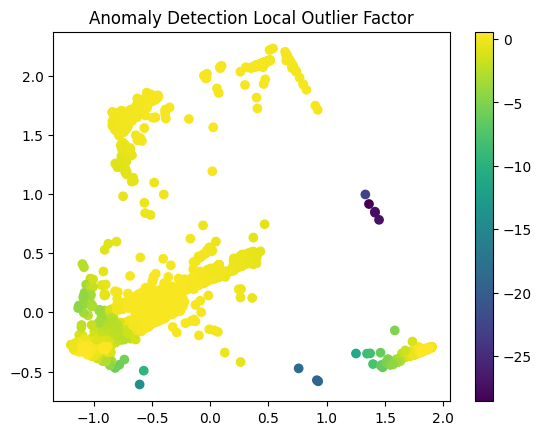

In [6]:
# LoF
# Reducing dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Training Local Outlier Factor
detector_lof = LocalOutlierFactor(n_neighbors=1000, novelty=True)
detector_lof.fit(X_pca)

# Anomaly Detection
y_score_lof = detector_lof.decision_function(X_pca)

# Finding AUC Scores
auc_lof = roc_auc_score(y, y_score_lof)
print('\n AUC score: %f\n' % auc_lof)

y_predict_lof = detector_lof.predict(X_pca)
auc_pred_lof = roc_auc_score(y, y_predict_lof)
print('\n AUC Predict: %f\n' % auc_pred_lof)

# Plot graph
plt.scatter(X_pca[:,0], X_pca[:,1], c= y_score_lof, cmap='viridis')
plt.colorbar()
plt.title('Anomaly Detection Local Outlier Factor')
plt.show()


 AUC score: 0.839787


 AUC Predict: 0.564319



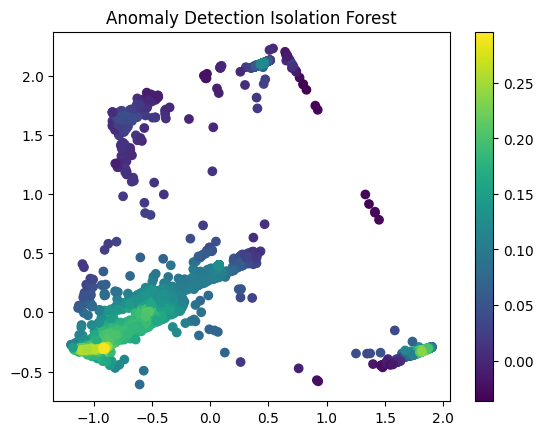

In [7]:
# Isolation Forest
# Reducing dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Training Isolation Forest
detector_if = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
detector_if.fit(X_pca)

# Anomaly Detection
y_score_if = detector_if.decision_function(X_pca)

# Finding AUC Scores
auc_if = roc_auc_score(y, y_score_if)
print('\n AUC score: %f\n' % auc_if)

y_predict_if = detector_if.predict(X_pca)
auc_pred_if = roc_auc_score(y, y_predict_if)
print('\n AUC Predict: %f\n' % auc_pred_if)

# Plot graph
plt.scatter(X_pca[:,0], X_pca[:,1], c= y_score_if, cmap='viridis')
plt.colorbar()
plt.title('Anomaly Detection Isolation Forest')
plt.show()

In [ ]:
# In Summary
# Decided to do two Anomaly detection, Local Outlier Factor (LoF) and Isolation Forest (iF)
# LoF Area Under Curve is higher than IF's which means LoF has better accurate prediction than iF
# However LoF is worse than IF if AUC uses predict and not decision function